# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = float(1.2)
my_eth = float(5.3)

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = float(btc_data[u"data"][u"1"][u"quotes"][u"USD"][u"price"])

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = float(eth_data[u"data"][u"1027"][u"quotes"][u"USD"][u"price"])

# Compute current value of my crpto
my_btc_value = (btc_price * my_btc)
my_eth_value = (eth_price * my_eth)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

#### Extra - calc & print combined crypto value to use in Savings Health Analysis
my_crypto_value = ((btc_price * my_btc) + (eth_price * my_eth))
print(f"\nNote: The total value of your crypto wallet is ${my_crypto_value:0.2f}")

The current value of your 1.2 BTC is $36535.20
The current value of your 5.3 ETH is $6641.64

Note: The total value of your crypto wallet is $43176.84


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares @ 80/20 stockbond split
my_agg = int(200)
my_spy = int(50)

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alp_api_obj = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-01-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
my_shares = alp_api_obj.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

# Preview DataFrame
my_shares

AGG                                         SPY  \
                             open     high       low   close   volume    open   
2021-01-26 00:00:00-05:00  117.46  117.585  117.4255  117.51  3451493  385.41   

                                                             
                             high     low   close    volume  
2021-01-26 00:00:00-05:00  385.85  383.54  383.83  36871235

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(my_shares["AGG"]["close"])
spy_close_price = float(my_shares["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.51
Current SPY closing price: $383.83


In [10]:
# Compute the current value of shares
my_spy_value = (my_spy * spy_close_price)
my_agg_value = (my_agg * agg_close_price)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

#### Extra - calc & print combined shares value to use in Savings Health Analysis
my_shares_value = (my_spy_value + my_agg_value)
print(f"\nNOTE: The combined value of your shares is ${my_shares_value:0.2f}")

The current value of your 50 SPY shares is $19191.50
The current value of your 200 AGG shares is $23502.00

NOTE: The combined value of your shares is $42693.50


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = float(12000)

# Create savings DataFrame
values = {
        "crypto": [my_crypto_value],
        "shares": [my_shares_value]
}

df_savings = pd.DataFrame.from_dict(values, orient = "index", columns = ["Amount"])
                                    
# Display savings DataFrame
display(df_savings)

,Amount
crypto,43176.842
shares,42693.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025580020D60>],
      dtype=object)

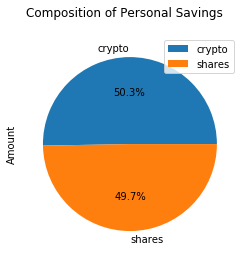

In [12]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True,title='Composition of Personal Savings',autopct='%1.1f%%')

In [13]:
# Set ideal emergency fund
emergency_fund = (monthly_income * 3)

# Calculate total amount of savings
total_savings = (my_crypto_value + my_shares_value)

# Validate saving health
if (total_savings > emergency_fund):
    print(f"Congratulations, you have enough money in your fund!")
if (total_savings == emergency_fund):
        print(f"Congratulations, you've reached you're financial goal!")
if (total_savings < emergency_fund):
        print(f"You are ${total_savings - emergency_fund} from reaching the goal")

Congratulations, you have enough money in your fund!


## Part 2 - Retirement Planning
### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alp_api_obj.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                              SPY                                     
                             open    high     low   close     volume  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268  
2016-01-29 00:00:00-05:00  190.02  193.75  189.88  193.69  145410523

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
sims = 500

MC30_Forecast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = sims,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
print(df_stock_data)
print(f"\nThe number of monte Carlo Simulations is {sims}.")

                              AGG                                       \
                             open      high       low   close   volume   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   
...                           ...       ...       ...     ...      ...   
2021-01-19 00:00:00-05:00  117.27  117.4200  117.2200  117.41  5057257   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.3100  117.40  3877734   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.1400  117.26  5801029   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.1900  117.26  3469745   
2021-01-25 00:00:00-05:00  117.39  117.5600  117.3600  117.54  3977366   

                              SPY    

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC30_Forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004446,0.990122,1.000765,1.001310,0.999761,1.001295,1.006552,0.990654,1.000609,1.003772,...,0.998177,0.998673,0.991680,1.009411,1.004243,1.003995,0.992398,1.001834,0.997318,1.005614
2,1.006685,0.980681,1.002934,0.990774,0.994028,1.001733,1.010423,0.999888,0.995016,1.001547,...,0.996471,0.996553,0.989096,1.006757,0.997642,0.993290,0.985339,1.009241,0.983850,1.004928
3,0.997402,0.983510,1.002124,1.000674,0.994351,1.000215,1.018224,0.993882,0.994150,1.004534,...,1.002243,0.987501,0.983581,1.003999,0.999990,0.986875,0.982235,1.001734,0.976574,0.993468
4,0.983777,0.990430,1.006861,0.999898,0.994691,1.001629,1.017994,0.987838,0.992717,1.009536,...,0.996631,0.979727,0.986406,1.007486,0.994824,0.986358,0.989725,1.007499,0.977532,0.993527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.804837,8.628879,5.730560,14.526209,6.574395,24.025940,17.617076,12.749157,15.519841,16.061354,...,17.494879,7.698799,19.913289,6.179808,41.742728,5.046216,9.349068,7.807292,10.969804,5.622837
7557,7.828006,8.567963,5.737055,14.437453,6.552881,24.207624,17.631709,12.704251,15.648384,15.995416,...,17.476354,7.677776,19.952718,6.188444,41.744363,5.083295,9.330708,7.834329,10.945156,5.610306
7558,7.849719,8.598888,5.751572,14.576741,6.563840,24.194434,17.639590,12.742815,15.690872,15.861088,...,17.492683,7.705516,19.976598,6.138531,42.208769,5.127613,9.333422,7.851550,10.880639,5.620923
7559,7.835966,8.621883,5.792540,14.487108,6.635212,24.086743,17.691616,12.795719,15.750650,15.724458,...,17.521181,7.734517,19.998579,6.141307,41.780539,5.164054,9.346438,7.822769,10.874947,5.576989


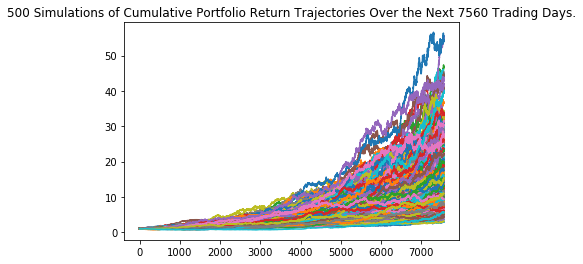

In [19]:
# Plot simulation outcomes
MC_sim_plot = MC30_Forecast.plot_simulation()

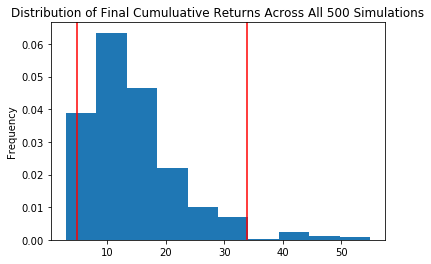

In [20]:
# Plot probability distribution and confidence intervals
MC_prob_conf_plot = MC30_Forecast.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
table = MC30_Forecast.summarize_cumulative_return()

# Print summary statistics
print(table)

count           500.000000
mean             14.528407
std               8.063660
min               2.935289
25%               8.791784
50%              12.784601
75%              17.838071
max              54.946013
95% CI Lower      4.930210
95% CI Upper     33.967224
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(table[8] * initial_investment,2)
ci_upper = round(table[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98604.2 and $679344.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
init_inv_incr150 = (initial_investment * 1.5)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(table[8] * init_inv_incr150,2)
ci_upper = round(table[9] * init_inv_incr150,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_inv_incr150} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $147906.29 and $1019016.72


## Optional Challenge - Early Retirement
### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC5_sims = 500

MC5_Forecast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = MC5_sims,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC5_Forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997731,1.014029,0.993934,0.995566,0.998840,1.006106,1.000603,0.991546,0.997217,1.004046,...,0.997300,1.008864,0.998773,0.997391,1.006467,0.987831,1.010716,1.002021,1.002146,1.010383
2,1.006471,1.014176,0.991792,1.005507,0.997222,1.009050,0.997238,0.983542,0.997504,1.000045,...,1.006804,1.013662,1.005607,0.997278,1.014792,0.988246,1.014126,1.007325,1.014312,1.019834
3,1.012497,1.005458,0.988349,1.004831,1.001564,1.008573,1.001215,0.988272,1.003300,0.995811,...,1.000386,1.003324,1.010456,0.992110,1.019772,0.995089,1.012977,1.008545,1.009259,1.017631
4,1.006244,1.008294,0.986534,1.000593,1.016035,1.007439,1.012561,0.982454,0.998278,0.994458,...,1.002884,1.005427,1.004276,1.007159,1.017437,1.009275,1.024737,0.998283,1.000275,1.011577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.755300,2.177833,1.632101,1.677498,1.437350,1.365219,1.756926,1.450623,1.579321,1.720709,...,1.592879,1.085266,1.344500,1.470080,1.776198,1.820975,2.013897,1.442644,1.454395,2.310751
1257,1.752609,2.168200,1.623208,1.678646,1.452726,1.367864,1.761446,1.443763,1.583292,1.721795,...,1.594814,1.087737,1.343774,1.468342,1.779289,1.822317,2.018045,1.455302,1.465216,2.318946
1258,1.748342,2.156598,1.612344,1.677789,1.469949,1.364358,1.779754,1.447579,1.588478,1.715033,...,1.583359,1.093759,1.334763,1.490950,1.797035,1.823662,2.000627,1.445810,1.459333,2.333556
1259,1.738405,2.153369,1.606452,1.695277,1.482439,1.365015,1.795882,1.458470,1.589439,1.735428,...,1.581241,1.100984,1.321743,1.509453,1.793293,1.833897,2.004515,1.434147,1.444859,2.320706


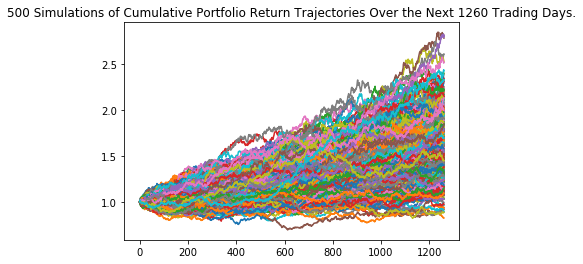

In [26]:
# Plot simulation outcomes
MC5_Forecast.plot_simulation()

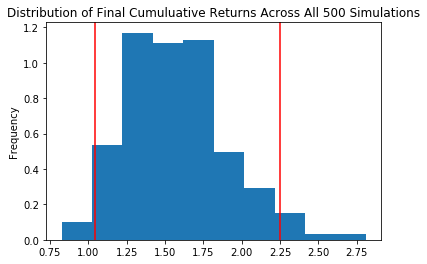

In [27]:
# Plot probability distribution and confidence intervals
MC_prob_conf_plot = MC5_Forecast.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
table = MC5_Forecast.summarize_cumulative_return()

# Print summary statistics
print(table)

count           500.000000
mean              1.573366
std               0.326488
min               0.825623
25%               1.328648
50%               1.549316
75%               1.759940
max               2.809295
95% CI Lower      1.045218
95% CI Upper      2.248722
Name: 1260, dtype: float64


In [29]:
# Set initial investment
MC5_init_inv = float(60000)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(table[8] * MC5_init_inv,2)
ci_upper_five = round(table[9] * MC5_init_inv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${MC5_init_inv} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 5 years will end within in the range of $62713.06 and $134923.32


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC10_sims = 500

MC10_Forecast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = MC10_sims,
    num_trading_days = 252 * 10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC10_Forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999815,0.992471,0.996794,0.993991,0.999248,1.004523,1.003435,0.995539,0.999036,0.988701,...,0.997290,0.997267,1.003035,1.008823,1.000723,1.001302,1.009926,0.997249,0.994336,1.000369
2,1.003309,0.985106,0.993938,1.003585,1.000731,1.003369,1.006279,0.995772,1.005139,0.995657,...,1.004287,1.000185,0.995900,1.003396,0.997443,1.002331,1.008540,0.987361,0.991289,0.998751
3,1.001136,0.974659,1.003422,0.998984,1.004770,1.010790,1.014217,0.993320,1.003290,0.983635,...,1.000355,0.997549,0.988041,1.009849,0.998630,1.004698,0.994071,0.999837,0.984747,0.994164
4,1.000478,0.987214,1.009146,1.004721,1.001707,1.007669,1.005648,1.006270,1.009127,0.981704,...,1.003500,1.004589,0.992017,1.001460,0.997877,0.999912,0.986746,0.999358,0.974316,0.998877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.293570,2.568430,4.804079,2.215734,1.548864,3.648326,3.478657,3.927635,1.620423,2.274375,...,3.463668,2.655532,2.526135,1.835105,2.290753,1.339536,1.603168,2.651046,1.470378,4.092661
2517,2.278986,2.587626,4.838578,2.202570,1.548644,3.642000,3.460573,3.941173,1.620862,2.281985,...,3.482702,2.675228,2.555973,1.854956,2.266677,1.355114,1.613860,2.649280,1.472580,4.098442
2518,2.283163,2.571824,4.830910,2.194330,1.543797,3.645328,3.489241,3.966120,1.619205,2.302988,...,3.494604,2.669896,2.571086,1.864572,2.240463,1.367727,1.598142,2.661908,1.472638,4.079380
2519,2.292735,2.556204,4.822662,2.189755,1.541495,3.658284,3.494865,3.987121,1.613545,2.324434,...,3.489752,2.665656,2.554749,1.867221,2.245643,1.371342,1.605319,2.684504,1.479269,4.077625


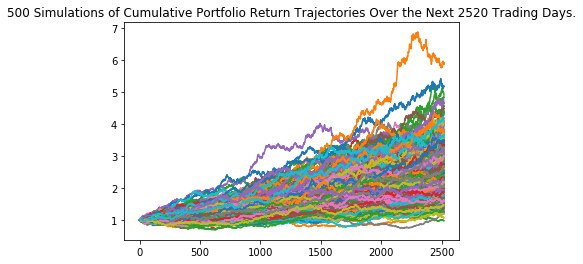

In [32]:
# Plot simulation outcomes
MC10_Forecast.plot_simulation()

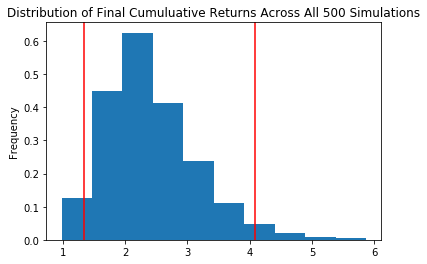

In [33]:
# Plot probability distribution and confidence intervals
MC_prob_conf_plot = MC10_Forecast.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
table = MC10_Forecast.summarize_cumulative_return()

# Print summary statistics
print(table)

count           500.000000
mean              2.411054
std               0.729184
min               0.977527
25%               1.912104
50%               2.281700
75%               2.785410
max               5.868837
95% CI Lower      1.339817
95% CI Upper      4.082715
Name: 2520, dtype: float64


In [35]:
# Set initial investment
MC10_init_inv = float(60000)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(table[8] * MC10_init_inv,2)
ci_upper_ten = round(table[9] * MC10_init_inv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${MC10_init_inv} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 10 years will end within in the range of $80389.04 and $244962.91
